In [23]:
import pandas as pd
from math import exp, log
from statsmodels.formula.api import logit
import matplotlib.pyplot as plt
import sklearn.metrics as skm
from statsmodels.formula.api import ols

In [24]:
voters = pd.read_csv("C:/Users/jacob/Documents/Classes/Predictive Modeling/Week 5/Assignment2/BAS 230 - Assignment 2 input.csv")
voters.head()

,Unnamed: 0,voter_reg_num,status_lbl,city,race_lbl,party_lbl,gender_lbl,registration_dt,eoy_age,congressional_district_lbl,Vote1,Vote2,voted_both_elections,years_since_registration,age_group
0,0,100630233,Inactive,Raleigh,Other,Unaffiliated,Unknown,2018-09-10,23,5,Did Not Vote,Did Not Vote,DNV in both,3.0,28 or younger
1,1,100339952,Inactive,Raleigh,White,Unaffiliated,Female,2013-07-08,29,5,Did Not Vote,Did Not Vote,DNV in both,8.0,Between 29 and 34
2,2,10165132,Active,Raleigh,White,Democrat,Female,1991-01-01,64,5,Voted,Voted,voted both elections,30.0,48 or older
3,3,27940,Active,Raleigh,White,Democrat,Male,1974-01-01,65,5,Voted,Voted,voted both elections,47.0,48 or older
4,5,100576872,Active,Raleigh,White,Unaffiliated,Male,2017-09-06,22,5,Did Not Vote,Did Not Vote,DNV in both,4.0,28 or younger


In [25]:
voters['race_lbl'] = voters.race_lbl.replace(['P'],'Other')

Creating the functions and applying those functions to current variables to turn them into new variables that are binary, these will be used as the target variables

In [26]:
value_labels = ['short','moderately short','moderately long','long']
voters['registered_length'] = pd.qcut(voters.years_since_registration,
                                     q=4, labels=value_labels)
voters.registered_length.value_counts()

short               87927
moderately short    86996
long                78092
moderately long     62591
Name: registered_length, dtype: int64

In [27]:
cat_vars = ['status_lbl','city','race_lbl','party_lbl','gender_lbl','congressional_district_lbl','age_group','registered_length']
for i in cat_vars:
    print(pd.crosstab(voters[i],
                     voters.Vote1,
                     normalize = 'index'))

Vote1       Did Not Vote     Voted
status_lbl                        
Active          0.262893  0.737107
Inactive        0.817372  0.182628
Vote1        Did Not Vote     Voted
city                               
Apex             0.305041  0.694959
Cary             0.302964  0.697036
Other            0.355449  0.644551
Raleigh          0.337907  0.662093
Wake forest      0.311424  0.688576
Vote1     Did Not Vote     Voted
race_lbl                        
Black         0.381126  0.618874
Other         0.459068  0.540932
White         0.290452  0.709548
Vote1         Did Not Vote     Voted
party_lbl                           
Democrat          0.291611  0.708389
Republican        0.314135  0.685865
Unaffiliated      0.383240  0.616760
Vote1       Did Not Vote     Voted
gender_lbl                        
Female          0.315358  0.684642
Male            0.336735  0.663265
Unknown         0.510468  0.489532
Vote1                       Did Not Vote     Voted
congressional_district_lbl      

In [28]:
func1 = lambda x: 1 if x == 'Voted' else 0

In [29]:
voters['voted_2018'] = voters.Vote1.apply(func1)
voters.head()

,Unnamed: 0,voter_reg_num,status_lbl,city,race_lbl,party_lbl,gender_lbl,registration_dt,eoy_age,congressional_district_lbl,Vote1,Vote2,voted_both_elections,years_since_registration,age_group,registered_length,voted_2018
0,0,100630233,Inactive,Raleigh,Other,Unaffiliated,Unknown,2018-09-10,23,5,Did Not Vote,Did Not Vote,DNV in both,3.0,28 or younger,short,0
1,1,100339952,Inactive,Raleigh,White,Unaffiliated,Female,2013-07-08,29,5,Did Not Vote,Did Not Vote,DNV in both,8.0,Between 29 and 34,moderately short,0
2,2,10165132,Active,Raleigh,White,Democrat,Female,1991-01-01,64,5,Voted,Voted,voted both elections,30.0,48 or older,long,1
3,3,27940,Active,Raleigh,White,Democrat,Male,1974-01-01,65,5,Voted,Voted,voted both elections,47.0,48 or older,long,1
4,5,100576872,Active,Raleigh,White,Unaffiliated,Male,2017-09-06,22,5,Did Not Vote,Did Not Vote,DNV in both,4.0,28 or younger,short,0


In [45]:
model1_2018 = logit(formula='voted_2018 ~ C(status_lbl) + C(city)',
                   data=voters).fit()
model1_2018.params

Optimization terminated successfully.
         Current function value: 0.562656
         Iterations 5


Intercept                    1.079651
C(status_lbl)[T.Inactive]   -2.536839
C(city)[T.Cary]              0.073591
C(city)[T.Other]            -0.206736
C(city)[T.Raleigh]          -0.022039
C(city)[T.Wake forest]      -0.021141
dtype: float64

In [46]:
voters['prob_2018_1'] = model1_2018.predict(voters)

In [48]:
fpr, tpr, thresholds = skm.roc_curve(voters['voted_2018'],
                                    voters['prob_2018_1'])

In [49]:
auc_score = skm.auc(fpr,tpr)

In [50]:
def plot_roc(fpr,tpr):
    # AUC score
    auc_score = skm.auc(fpr,tpr)
    # ROC curve
    skm.RocCurveDisplay(fpr=fpr, tpr=tpr,
                       roc_auc=auc_score,estimator_name='results').plot()
    # Add the diagonal line
    plt.plot([0, 1], [0, 1], 
             color='orange', 
             linestyle='--')

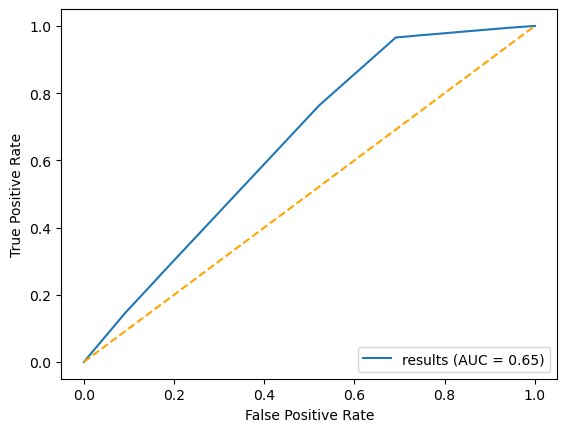

In [51]:
plot_roc(fpr,tpr)

In [52]:
model2_2018 = logit(formula='voted_2018 ~ C(status_lbl) + C(city) + C(race_lbl)',
                   data=voters).fit()
model2_2018.params

Optimization terminated successfully.
         Current function value: 0.557046
         Iterations 5


Intercept                    0.931174
C(status_lbl)[T.Inactive]   -2.507916
C(city)[T.Cary]              0.126616
C(city)[T.Other]            -0.180015
C(city)[T.Raleigh]           0.016673
C(city)[T.Wake forest]      -0.032270
C(race_lbl)[T.Other]        -0.400928
C(race_lbl)[T.White]         0.271106
dtype: float64

In [53]:
voters['prob_2018_2'] = model2_2018.predict(voters)

In [54]:
fpr, tpr, thresholds = skm.roc_curve(voters['voted_2018'],
                                    voters['prob_2018_2'])

In [55]:
auc_score = skm.auc(fpr,tpr)

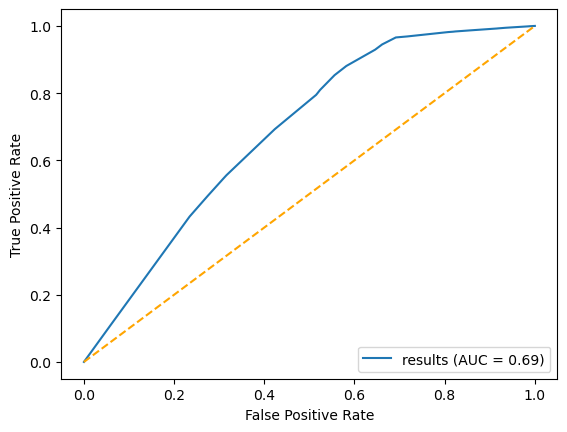

In [56]:
plot_roc(fpr,tpr)

Optimization terminated successfully.
         Current function value: 0.552426
         Iterations 5


Intercept                       1.081798
C(status_lbl)[T.Inactive]      -2.501734
C(city)[T.Cary]                 0.122114
C(city)[T.Other]               -0.188675
C(city)[T.Raleigh]             -0.012620
C(city)[T.Wake forest]         -0.029448
C(race_lbl)[T.Other]           -0.189580
C(race_lbl)[T.White]            0.507723
C(party_lbl)[T.Republican]     -0.428070
C(party_lbl)[T.Unaffiliated]   -0.543258
dtype: float64